# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> **Do not use Copilot for this assignment.** I'd like for you to get some practice before AI does all the work!

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [4]:
df = pd.read_excel('richpeople.xlsx')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

In [6]:
df.shape

(1653, 30)

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [10]:
df.sort_values(by='networthusbillion', ascending=False).head(10)


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [17]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [18]:
1473+180

1653

## 4b) What percent is that?

In [19]:
(df.gender.value_counts() / 1653) * 100

male      89.110708
female    10.889292
Name: gender, dtype: float64

## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [20]:
df[df.gender == 'female'].networthusbillion.mean()

3.9205555555555547

In [21]:
df[df.gender == 'male'].networthusbillion.mean()

3.9027155465037335

## 5a) What is the most common source/type of wealth?

In [22]:
df.typeofwealth.value_counts()

inherited                   506
founder non-finance         467
self-made finance           344
privatized and resources    192
executive                   142
Name: typeofwealth, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [30]:
#df.groupby('typeofwealth').gender.count() this is wrong
female_b = df[df.gender == 'female']
male_b = df[df.gender == 'male']

In [36]:
#sorry soma i know you're going to hate the way i calculated this
(female_b.typeofwealth.value_counts() / (142 + 21 + 6 + 6 + 5) ) * 100

inherited                   78.888889
founder non-finance         11.666667
self-made finance            3.333333
executive                    3.333333
privatized and resources     2.777778
Name: typeofwealth, dtype: float64

In [40]:
(male_b.typeofwealth.value_counts() / (446 + 364 + 338 + 187 + 136) ) * 100

founder non-finance         30.319511
inherited                   24.745071
self-made finance           22.977566
privatized and resources    12.712441
executive                    9.245411
Name: typeofwealth, dtype: float64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [54]:
df.company.value_counts().head()
#company = df.company.value_counts().head()

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: company, dtype: int64

<AxesSubplot: >

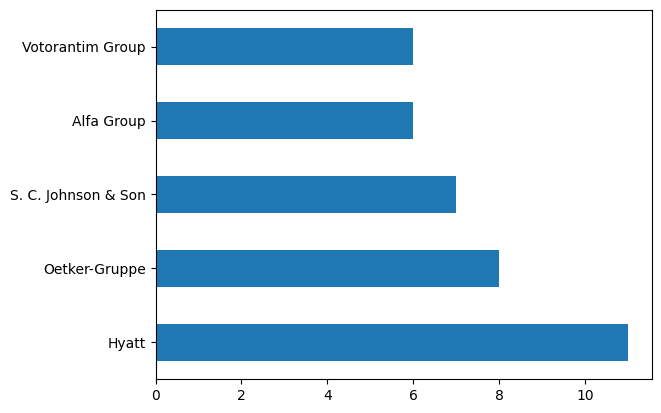

In [56]:
company.plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

In [58]:
  
# df.groupby('company').networthusbillion.sum().sort_values(ascending=False).head(10)
#don't know how to get those specific top 5


company
Walmart               148.8
Microsoft             112.5
Koch industries        92.6
Telmex                 72.0
Zara                   70.1
Google                 68.5
Berkshire Hathaway     60.4
Mars, Incorperated     60.0
Oracle                 48.0
Alfa Group             46.9
Name: networthusbillion, dtype: float64

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [60]:
df.groupby('citizenship')['networthusbillion'].sum().sort_values(ascending=False).head(10)

citizenship
United States     2322.4
Russia             422.5
Germany            401.4
China              375.8
France             235.3
Hong Kong          213.7
Brazil             192.2
India              191.9
Italy              158.1
United Kingdom     152.0
Name: networthusbillion, dtype: float64

## 9a) How old is an average billionaire?

In [61]:
df['age'].mean()

63.34213836477988

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [62]:
df[df['selfmade']=='self-made']['age'].mean()

62.62589928057554

In [63]:
df[df['selfmade']=='inherited']['age'].mean()

64.96218487394958

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [76]:
#youngest
df.sort_values(by='age', ascending=False).tail(3) #don't know how to remove nulls


,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1516,2014,Victor Civita Neto,1540,Brazil,BRA,1.1,inherited,inherited,male,NaN,...,relation,1950.0,NaN,media,3rd generation,NaN,http://www.forbes.com/profile/roberta-anamaria...,NaN,NaN,NaN
1555,2014,Wang Wei,375,China,CHN,4.0,self-made,founder non-finance,male,NaN,...,founder,1993.0,NaN,delivery service,2013 Saw investment from outside investors wit...,NaN,http://www.forbes.com/profile/wang-wei/,NaN,NaN,NaN
1598,2014,Wu Xiong,1565,China,CHN,1.0,self-made,executive,male,NaN,...,owner,1999.0,NaN,infant formula,NaN,NaN,http://www.forbes.com/profile/wu-xiong/,NaN,NaN,NaN


In [77]:
#oldest
df.sort_values(by='age', ascending=False).head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<AxesSubplot: >

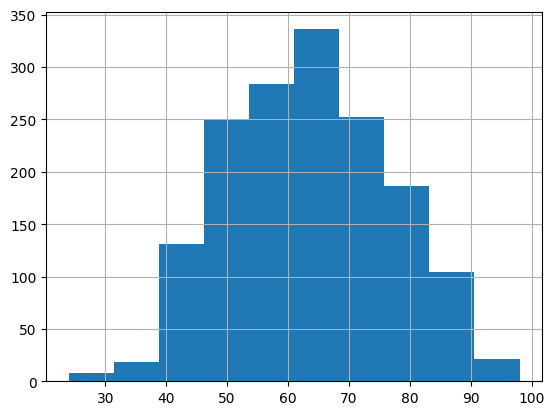

In [78]:
df['age'].hist()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<AxesSubplot: xlabel='networthusbillion', ylabel='age'>

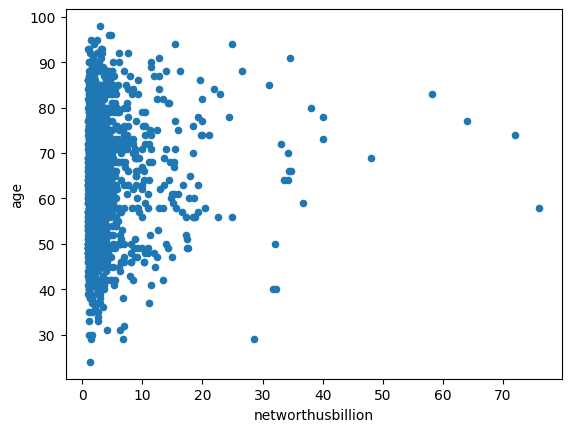

In [79]:
df.plot(kind='scatter',
       x='networthusbillion',
       y='age')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<AxesSubplot: xlabel='name'>

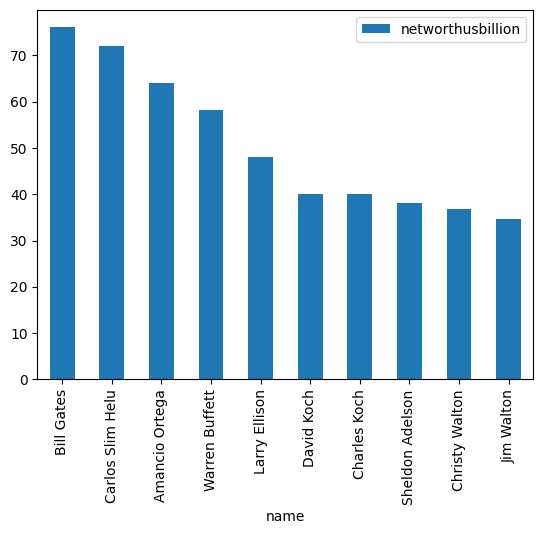

In [81]:
df.sort_values(by='networthusbillion', ascending=False).head(10).plot.bar(x='name', y='networthusbillion')